# LAB 3A : Implement Simple Linear regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import dataset

In [2]:
dataset = pd.read_csv("data.csv")

## EDA Steps

In [3]:
dataset.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [4]:
dataset.shape

(15, 2)

In [5]:
dataset.columns

Index(['Height', 'Weight'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [7]:
dataset.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


## Preprocessing Steps

In [4]:
# Step 1 : Seperate i/p Independent Var and 
# o/p Dependent Var
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [9]:
print(X.head())

   Height
0    1.47
1    1.50
2    1.52
3    1.55
4    1.57


In [10]:
print(y.head())

0    52.21
1    53.12
2    54.48
3    55.84
4    57.20
Name: Weight, dtype: float64


In [5]:
# Step 4 : Split data into training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split (X,y,
                                        test_size = 0.3,
                                        random_state = 9)

In [6]:
print(X_train.shape)
print(X_test.shape)

(10, 1)
(5, 1)


## Create the Regression model on training data

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1= ",regressor.coef_)

Intercept B0 =  -42.1913964702478
Coefficient B1=  [63.0882438]


From Above values our model regression line equation

**y = -42.1913964702478 + 63.0882438 * X**

By using this equation lets find weight for height =1.45 meter

In [9]:
ynew = -42.1913964702478 + 63.0882438 * 1.45

print("weight for height(1.45 meter) = ",ynew)

weight for height(1.45 meter) =  49.28655703975219


In [10]:
ypred = regressor.predict(X_test)

In [11]:
print(ypred)
print(y_test)

[71.36744238 61.90420581 66.95126531 53.70273411 50.54832192]
13    72.19
7     61.29
10    66.28
2     54.48
0     52.21
Name: Weight, dtype: float64


#### Accuracy of model

In [12]:
# 1. Training Accuracy

print("Training accuracy =",
      regressor.score(X_train,y_train))

Training accuracy = 0.9916295406010937


In [13]:
# 2. Testing Accuracy

print("Testing accuracy =",
      regressor.score(X_test,y_test))

Testing accuracy = 0.982131446908672


### Visualizing the Model

#### 1. Visualize the training data

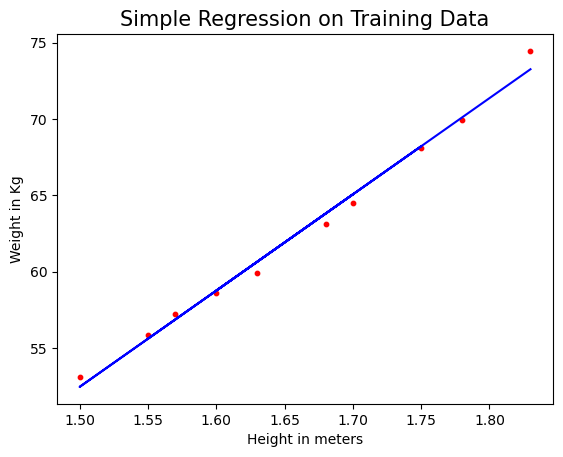

In [14]:
plt.scatter(X_train,y_train,color = 'red', s= 10)
plt.plot(X_train, regressor.predict(X_train),
        color = 'blue')
plt.title("Simple Regression on Training Data", size= 15)
plt.xlabel("Height in meters")
plt.ylabel("Weight in Kg")
plt.show()

#### 2. Visualize the testing data

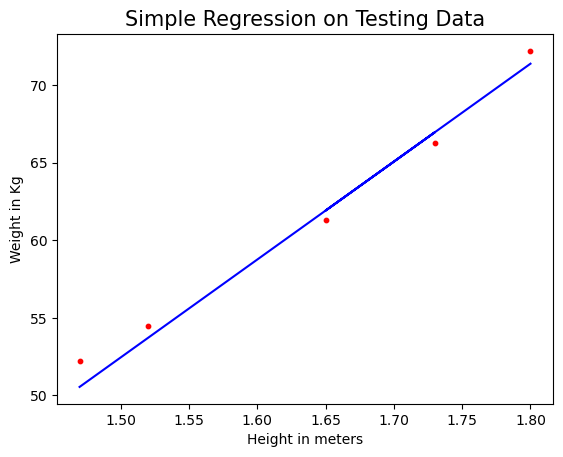

In [15]:
plt.scatter(X_test,y_test,color = 'red', s= 10)
plt.plot(X_test, regressor.predict(X_test),
        color = 'blue')
plt.title("Simple Regression on Testing Data", size= 15)
plt.xlabel("Height in meters")
plt.ylabel("Weight in Kg")
plt.show()

#### Find R^2 Score of model

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.982131446908672

### When random_state parameter = 0 
Then Accuracy Score (Training:0.9922780716193956 and Testing:0.9816224797640156)
#### R2 Score 0.9816224797640156
Coefficient of model(59.90953307)
#### Intercept of model(-36.76345330739302)
Test Example Result:weight for height(1.45 meter) =  50.10536964410697

### When random_state parameter = 9 
Then Accuracy Score (Training:0.9916295406010937 and Testing:0.982131446908672)
#### R2 Score 0.982131446908672
Coefficient of model(63.0882438)
#### Intercept of model(-42.1913964702478)
Test Example Result:weight for height(1.45 meter) =  49.28655703975219